In [1]:
import pandas as pd

data = pd.read_csv("datasets/lang.csv", index_col=0)
data.head()

,country,finnish,swedish,danish,norwegian,english,german,dutch,flemish,french,italian,spanish,portuguese
austria,1,0,0,0,0,21,100,2,1,10,2,1,0
italy,2,0,0,0,0,5,3,0,0,11,100,1,0
france,3,0,2,3,0,10,7,1,1,100,12,7,1
netherlands,4,0,0,0,0,41,47,100,100,16,2,2,0
belgium,5,0,0,0,0,14,15,0,59,44,2,1,0


In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler

X = data.iloc[:,1:]

X = StandardScaler().fit_transform(X)

for i in ['single','complete','average','ward']:
    Z = linkage(X,i)
    c, coph_dists = cophenet(Z, pdist(X))
    print('Connection: {}, Cophenetic correlation: {}'.format(i,c))

Connection: single, Cophenetic correlation: 0.8724338366197254
Connection: complete, Cophenetic correlation: 0.8802106444290279
Connection: average, Cophenetic correlation: 0.9287795664798996
Connection: ward, Cophenetic correlation: 0.7680423931564108


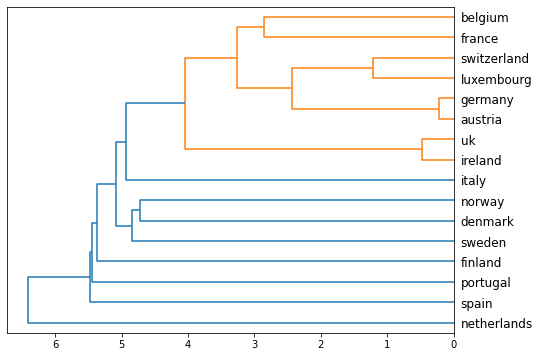

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
Z = linkage(X,'average')
dn = dendrogram(Z,labels=data.index,orientation='left')

### Determining the clusters

We can find the clusters that have a distace above a specified threshhold using the `fclusters` function.
Here, we can see that no links exist above a distance of 7 - use the ```fclusters``` function from ```scipy.cluster.hierarchy``` with this max distance to return our cluster IDs.

In [36]:
max_dist = 5 # pairwise distance
clusters = fcluster(Z, max_dist, criterion='distance')
set(clusters)

{1, 2, 3, 4, 5, 6}

scipy.cluster.hierarchy.fcluster can be used to flatten the dendrogram, obtaining as a result an assignation of the original data points to single clusters.

This assignation mostly depends on a distance threshold t - the maximum inter-cluster distance allowed:

{1, 2}


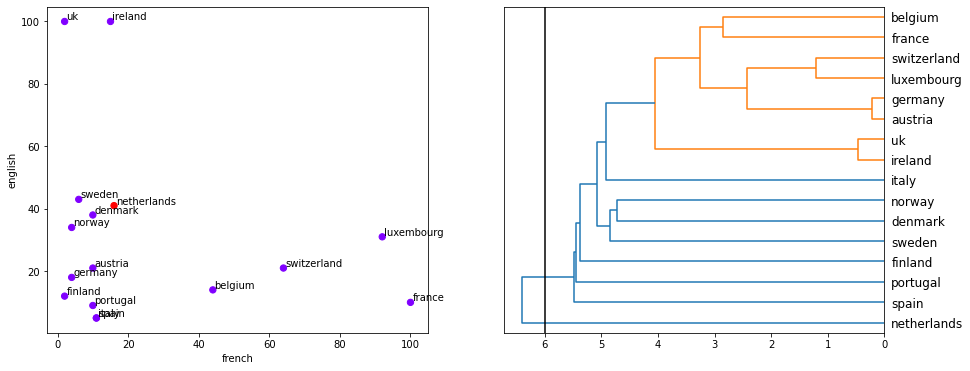

In [33]:
import matplotlib.cm as cm
def dend_clusters(dist, x='english', y='german'):
    fig, ax = plt.subplots(1,2, figsize=(15,6))
    clusters = fcluster(Z, dist, criterion='distance')
    ax[0].scatter(data[x], data[y], c=clusters, cmap=cm.rainbow, s=40)
    for country in data.index:
        ax[0].annotate(country, (data.loc[country,x]+0.5,\
                                 data.loc[country,y]+0.5))
    ax[0].set_xlabel(x)
    ax[0].set_ylabel(y)
    
    dendrogram(Z, orientation='left', labels=data.index)
    ax[1].plot([dist,dist], [0,2000], c='k')
    print(set(clusters))
    
dend_clusters(6, 'french', 'english')

In [34]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
 
# randomly chosen dataset
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
 
# here we need to mention the number of clusters
# otherwise the result will be a single cluster
# containing all the data
clustering = AgglomerativeClustering(n_clusters = 2).fit(X)
 
# print the class labels
print(clustering.labels_)

[1 1 1 0 0 0]
